# Statistics review 14: Logistic regression

R code accompanying [paper](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1065119/pdf/cc3045.pdf)

## Key learning points

- Modeling the dependence of a binary response variable on one or more explanatory variables

In [1]:
suppressPackageStartupMessages(library(tidyverse))

In [2]:
options(repr.plot.width=4, repr.plot.height=3)

In [3]:
marker <- seq(0.75, 4.75, by=0.5)
patients <- c(182, 233, 224, 236, 225, 215, 221, 200, 264)
deaths <- c(7, 27, 44, 91, 130, 168, 194, 191, 260)

df <- data.frame(marker=marker, patients=patients, deaths=deaths)
df

marker,patients,deaths
0.75,182,7
1.25,233,27
1.75,224,44
2.25,236,91
2.75,225,130
3.25,215,168
3.75,221,194
4.25,200,191
4.75,264,260


In [4]:
df1 <- df %>% mutate(prop=deaths/patients)
df1

marker,patients,deaths,prop
0.75,182,7,0.03846154
1.25,233,27,0.11587983
1.75,224,44,0.19642857
2.25,236,91,0.38559322
2.75,225,130,0.57777778
3.25,215,168,0.78139535
3.75,221,194,0.87782805
4.25,200,191,0.95500000
4.75,264,260,0.98484848


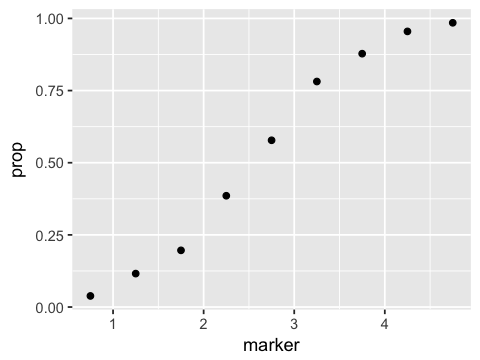

In [5]:
ggplot(df1, aes(x=marker, y=prop)) + geom_point()

In [6]:
df2 <- df1 %>% mutate(logit=log(prop/(1-prop)))
df2

marker,patients,deaths,prop,logit
0.75,182,7,0.03846154,-3.2188758
1.25,233,27,0.11587983,-2.0320393
1.75,224,44,0.19642857,-1.4087672
2.25,236,91,0.38559322,-0.4658742
2.75,225,130,0.57777778,0.3136576
3.25,215,168,0.78139535,1.2738164
3.75,221,194,0.87782805,1.9720213
4.25,200,191,0.95500000,3.0550489
4.75,264,260,0.98484848,4.1743873


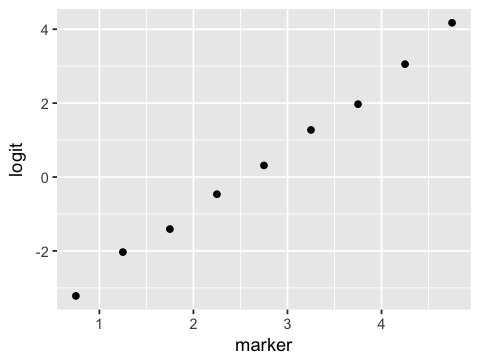

In [7]:
ggplot(df2, aes(x=marker, y=logit)) + geom_point()

## Maximum likelihood estimation

The parameters of many statistical models are estimated by maximizing the likelihood. This likelihood is a function of the unnormalized probability density after having observed some data. We will illustrate by example to give some intuition.

### Simulating sample data come from a population  

In [8]:
mu <- 4
sigma <- 1
x <- rnorm(100, mu, sigma)

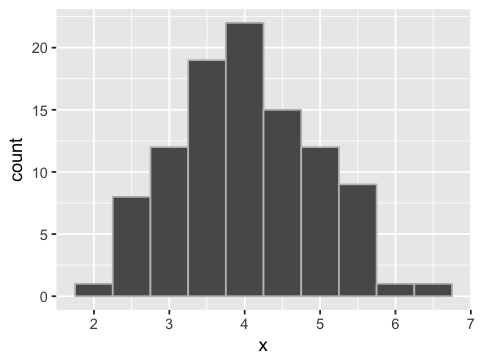

In [9]:
ggplot(data.frame(x=x), aes(x=x)) + geom_histogram(binwidth=0.5, color='grey')

### Likelihood

We have 100 samples independently drawn from the same normal distribution - that is, the samples are IID (independent identically distributed). The conditional probability of of a single sample $x_i$ is $N(\mu, \sigma \mid x_i)$. Because the samples are independent, the likelihood of seeing all 100 samples is just the product of 100 such conditional probabilities. 

If we fix the standard deviation to be 1 and vary the mean, we see that the likelihood function has a maximum near the true population mean ($\mu = 4$). Hence we can get a good estimate of $\mu$ by maximizing the likelihood. Typically, a numerical optimization algorithm is used to find the maximum - the value of $\mu$ (or other parameter) where this maximum occurs is the **maximum likelihood estimate** (MLE) of the population parameter.

In [10]:
mus <- seq(0, 8, length.out = 100)
lik <- vector('numeric', length=100)
for (i in 1:100) {
    lik[i] <- prod(dnorm(x, mean=mus[i], sd=1))
}

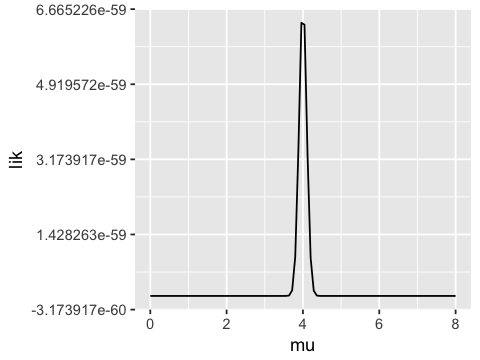

In [11]:
ggplot(data.frame(mu=mus, lik=lik), aes(x=mu, y=lik)) + geom_line()

### Working in log space

In practice, multiplying lots of small numbers to get a likelihood results in underflow because of the discreteness of computer arithmetic. So we work with log probabilities and sum them rather than take products, but the basic idea of maximizing the (log) likelihood is the same.

In [12]:
mus <- seq(0, 8, length.out = 100)
loglik <- vector('numeric', length=100)
for (i in 1:100) {
    loglik[i] <- sum(log(dnorm(x, mean=mus[i], sd=1)))
}

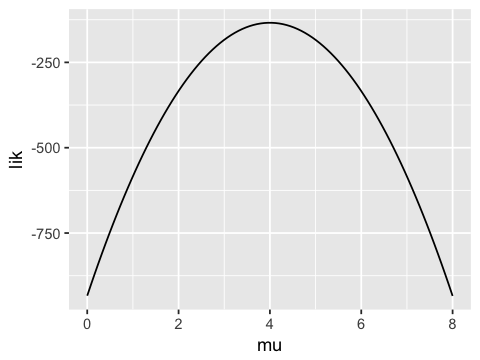

In [13]:
ggplot(data.frame(mu=mus, lik=loglik), aes(x=mu, y=lik)) + geom_line()

## Data with binary outcomes

We will try to predict admission to graduate school based on GRE, GPA and class rank. Rank is the prestige of the undergraduate institution, with 1 = most prestigious and 4 = least prestigious.

In [14]:
admit <- read.csv("http://stats.idre.ucla.edu/stat/data/binary.csv")

In [15]:
admit$rank <- as.factor(admit$rank)

In [16]:
str(admit)

'data.frame':	400 obs. of  4 variables:
 $ admit: int  0 1 1 1 0 1 1 0 1 0 ...
 $ gre  : int  380 660 800 640 520 760 560 400 540 700 ...
 $ gpa  : num  3.61 3.67 4 3.19 2.93 3 2.98 3.08 3.39 3.92 ...
 $ rank : Factor w/ 4 levels "1","2","3","4": 3 3 1 4 4 2 1 2 3 2 ...


In [17]:
head(admit)

admit,gre,gpa,rank
0,380,3.61,3
1,660,3.67,3
1,800,4.00,1
1,640,3.19,4
0,520,2.93,4
1,760,3.00,2


In [18]:
m <- glm(admit ~ gre + gpa + rank, data=admit, family="binomial")

In [19]:
summary(m)


Call:
glm(formula = admit ~ gre + gpa + rank, family = "binomial", 
    data = admit)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.6268  -0.8662  -0.6388   1.1490   2.0790  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -3.989979   1.139951  -3.500 0.000465 ***
gre          0.002264   0.001094   2.070 0.038465 *  
gpa          0.804038   0.331819   2.423 0.015388 *  
rank2       -0.675443   0.316490  -2.134 0.032829 *  
rank3       -1.340204   0.345306  -3.881 0.000104 ***
rank4       -1.551464   0.417832  -3.713 0.000205 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 499.98  on 399  degrees of freedom
Residual deviance: 458.52  on 394  degrees of freedom
AIC: 470.52

Number of Fisher Scoring iterations: 4


In [20]:
round(confint(m), 4)

Waiting for profiling to be done...


,2.5 %,97.5 %
(Intercept),-6.2716,-1.7925
gre,0.0001,0.0044
gpa,0.1603,1.4641
rank2,-1.3009,-0.0567
rank3,-2.0277,-0.6704
rank4,-2.4000,-0.7535


In [21]:
library(aod)

### Test significance of GRE

In [22]:
wald.test(b = coef(m), Sigma = vcov(m), Terms = 2)

Wald test:
----------

Chi-squared test:
X2 = 4.3, df = 1, P(> X2) = 0.038

### Test significance of GPA

In [23]:
wald.test(b = coef(m), Sigma = vcov(m), Terms = 3)

Wald test:
----------

Chi-squared test:
X2 = 5.9, df = 1, P(> X2) = 0.015

### Test significance of Rank

In [24]:
wald.test(b = coef(m), Sigma = vcov(m), Terms = 4:6)

Wald test:
----------

Chi-squared test:
X2 = 20.9, df = 3, P(> X2) = 0.00011

## Getting odds ratios

In [25]:
round(exp(cbind(OR = coef(m), confint(m))), 4)

Waiting for profiling to be done...


,OR,2.5 %,97.5 %
(Intercept),0.0185,0.0019,0.1665
gre,1.0023,1.0001,1.0044
gpa,2.2345,1.1739,4.3238
rank2,0.5089,0.2723,0.9448
rank3,0.2618,0.1316,0.5115
rank4,0.2119,0.0907,0.4707


#### Interpretation

For every unit increase in GPA, the odds of being admitted increase by a factor of 2.2345.

## Making predictions

In [26]:
head(admit)

admit,gre,gpa,rank
0,380,3.61,3
1,660,3.67,3
1,800,4.00,1
1,640,3.19,4
0,520,2.93,4
1,760,3.00,2


In [27]:
new.data <- with(admit, data.frame(gre=mean(gre), gpa=mean(gpa), rank=factor(1:4)))

In [28]:
new.data

gre,gpa,rank
587.7,3.3899,1
587.7,3.3899,2
587.7,3.3899,3
587.7,3.3899,4


In [29]:
new.data$p <- predict(m, new.data, type="response")
new.data

gre,gpa,rank,p
587.7,3.3899,1,0.5166016
587.7,3.3899,2,0.3522846
587.7,3.3899,3,0.2186120
587.7,3.3899,4,0.1846684


## Exercise

In [30]:
library(titanic)

In [31]:
head(titanic_train)

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,,S
6,0,3,"Moran, Mr. James",male,NA,0,0,330877,8.4583,,Q


In [32]:
str(titanic_train)

'data.frame':	891 obs. of  12 variables:
 $ PassengerId: int  1 2 3 4 5 6 7 8 9 10 ...
 $ Survived   : int  0 1 1 1 0 0 0 0 1 1 ...
 $ Pclass     : int  3 1 3 1 3 3 1 3 3 2 ...
 $ Name       : chr  "Braund, Mr. Owen Harris" "Cumings, Mrs. John Bradley (Florence Briggs Thayer)" "Heikkinen, Miss. Laina" "Futrelle, Mrs. Jacques Heath (Lily May Peel)" ...
 $ Sex        : chr  "male" "female" "female" "female" ...
 $ Age        : num  22 38 26 35 35 NA 54 2 27 14 ...
 $ SibSp      : int  1 1 0 1 0 0 0 3 0 1 ...
 $ Parch      : int  0 0 0 0 0 0 0 1 2 0 ...
 $ Ticket     : chr  "A/5 21171" "PC 17599" "STON/O2. 3101282" "113803" ...
 $ Fare       : num  7.25 71.28 7.92 53.1 8.05 ...
 $ Cabin      : chr  "" "C85" "" "C123" ...
 $ Embarked   : chr  "S" "C" "S" "S" ...


**1**. Fit a logistic regression model of survival against sex, age, and passenger class (Pclass). Remember to convert to factors as appropriate. Evaluate and interpret the impact of sex, age and passenger class on survival.